### Import Libraries and Mounte Drive

In [2]:
import numpy as np

import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
working_dir = '/content/drive/My Drive/Computer Vision Project'

In [4]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


### Load Data

In [6]:
trainingData = '/content/drive/My Drive/Computer Vision Project/Datasets/combined'

In [7]:
##### Parameters for loading the data 
size = (64,64)
bach_size = 64 
test_split = 0.2

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        print(label," is ready to load")
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [10]:

# using ImageDataGenerator() for generating a tenserflow object. 
imge_gen = ImageDataGenerator(
        rescale=1./255,
        samplewise_center=True,
        samplewise_std_normalization=True,
        validation_split=test_split,
        )

# using imge_gen(tensorflow object) to read the 90% of images & stored it as binary string (trianing data)
train_data_gen = imge_gen.flow_from_directory(
    trainingData,
    target_size=size,
    batch_size=bach_size,
    shuffle=True,
    class_mode='categorical',
    subset= "training"

)
# using imge_gen(tensorflow object) to read the 20% of images & stored it as binary string (testing data)
test_data_gen = imge_gen.flow_from_directory(
    trainingData,
    target_size=size,
    batch_size=bach_size,
    shuffle=True,
    class_mode='categorical',
    subset= "validation"
)

Found 96922 images belonging to 38 classes.
Found 24220 images belonging to 38 classes.


In [11]:
#retrieve the labels of all classes (categorries) from the trainingData directory
categories = os.listdir(trainingData)
len(categories)

38

In [ ]:
categories

## Data Information:



*   Traning Data - 109038 images
*   Testing Data - 12104 images
*   Number of Clasess - 38 Alphabet (a-z) , Numbers(0-9), space, delete.






## Data Visualization:
We will show one sample image from each class. The image data labeled by the name of its folder.


In [ ]:
%pylab inline
import sys

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


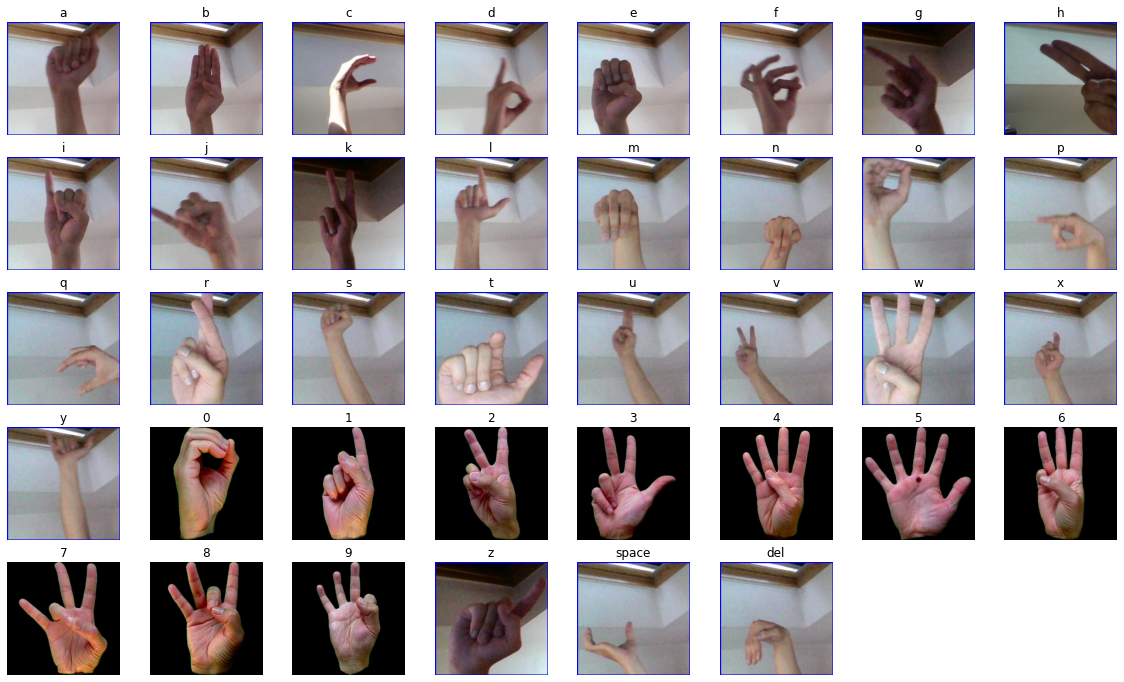

In [ ]:

train_images_paths = {}
#loop over all label and store their path in a list 
for label in categories:
    train_images_paths[label] = os.listdir(trainingData + '/' + label)

#show first sample image from each class (categories)
fig = figure(0, (20, 12))
i=0;
for label in categories:
    
    fig.add_subplot(5, 8, i+1)
    
    img = plt.imread(trainingData + '/' + list(train_images_paths.keys())[i] + '/' + list(train_images_paths.values())[i][0]) 
    i=i+1;

    imshow(img)
    title(label)
    axis('off')


## Training 


In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D , MaxPool2D
from tensorflow.keras import backend as k
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
epochs = 5
size = (64,64)

nums_class = 38
lr = 0.0009
#val_split = 0.1

In [16]:
#### Define layers in the CNN model####
aslmodel = Sequential()
# conv layer 1
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
# conv layer 2
aslmodel.add(Convolution2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 1
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization  
aslmodel.add(Dropout(0.5))
# conv layer 3
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# conv layer 4
aslmodel.add(Convolution2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
# max pool layer 2
aslmodel.add(MaxPool2D(pool_size = (4, 4)))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# conv layer 5
aslmodel.add(Convolution2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
# dropout requlrization
aslmodel.add(Dropout(0.5))
# flatten the output of the previous layer 
aslmodel.add(Flatten())
# dense layer
aslmodel.add(Dense(38, activation='softmax'))

aslmodel.summary();


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)        

In [ ]:
#### compile and fitting the model ####
aslmodel.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = aslmodel.fit(train_data_gen, epochs = 5, batch_size = 64)

Epoch 1/5
1515/1515 [==============================] - 20358s 13s/step - loss: 1.5622 - accuracy: 0.5504
Epoch 2/5
1515/1515 [==============================] - 8789s 6s/step - loss: 0.2259 - accuracy: 0.9332
Epoch 3/5
 863/1515 [================>.............] - ETA: 1:03:00 - loss: 0.2026 - accuracy: 0.9486

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
# serialize model to JSON
model_json = aslmodel.to_json()
with open("aslmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
aslmodel.save_weights("aslmodel.h5")
print("Saved aslmodel to disk")

In [ ]:
aslmodel.save("TrainingCNN.h5")